In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=66ee209f67e6f15b543d6a0d45301324517040afec9469a2f7f0fee7d9bb6ca3
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('churn_model').getOrCreate()

In [6]:
df=spark.read.csv('churn.csv',inferSchema=True,header=True)

In [7]:
df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [8]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



Tüm Harfleri Küçük Harfe Çevirmek

In [9]:
df = df.toDF(*[c.lower() for c in df.columns])

In [10]:
df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



"c0" sütunun ismini "index" olarak değiştirmek

In [11]:
df = df.withColumnRenamed("_c0","index")

In [12]:
df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [13]:
df.select("names").distinct().count()

899

In [14]:
df.groupby("names").count().sort("count", ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|    Patrick Bell|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [15]:
df.filter(df.names == "Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [16]:
#df.select("names").dropDuplicates().groupby("names").count().sort("count", ascending = False).show(3)

In [17]:
df.where(df.index == 439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [18]:
jen = df.where(df.index == 439).collect()[0]["names"]

In [19]:
df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [20]:
df.filter(df.age > 47).count()

161

In [21]:
df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [22]:
df.groupby("churn").agg({"age":"mean"}).show()

+-----+-----------------+
|churn|         avg(age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



In [23]:
kor_data = df.drop("index","names").toPandas()

Korelasyon Matrisi

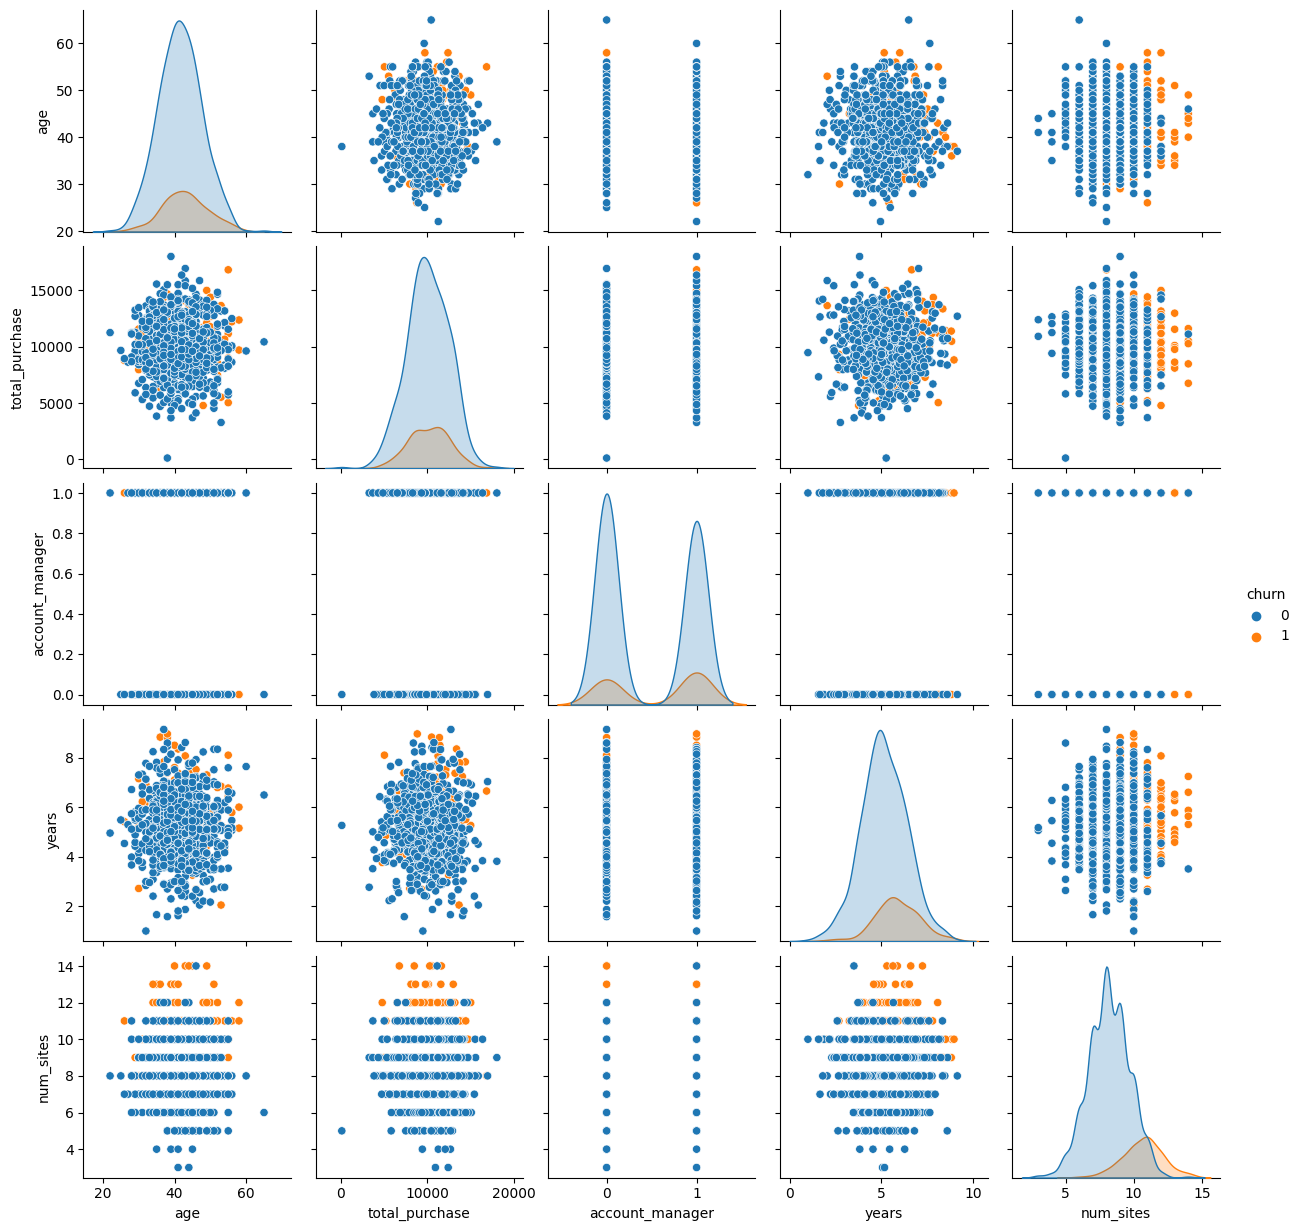

In [24]:
import seaborn as sns
sns.pairplot(kor_data, hue = "churn");

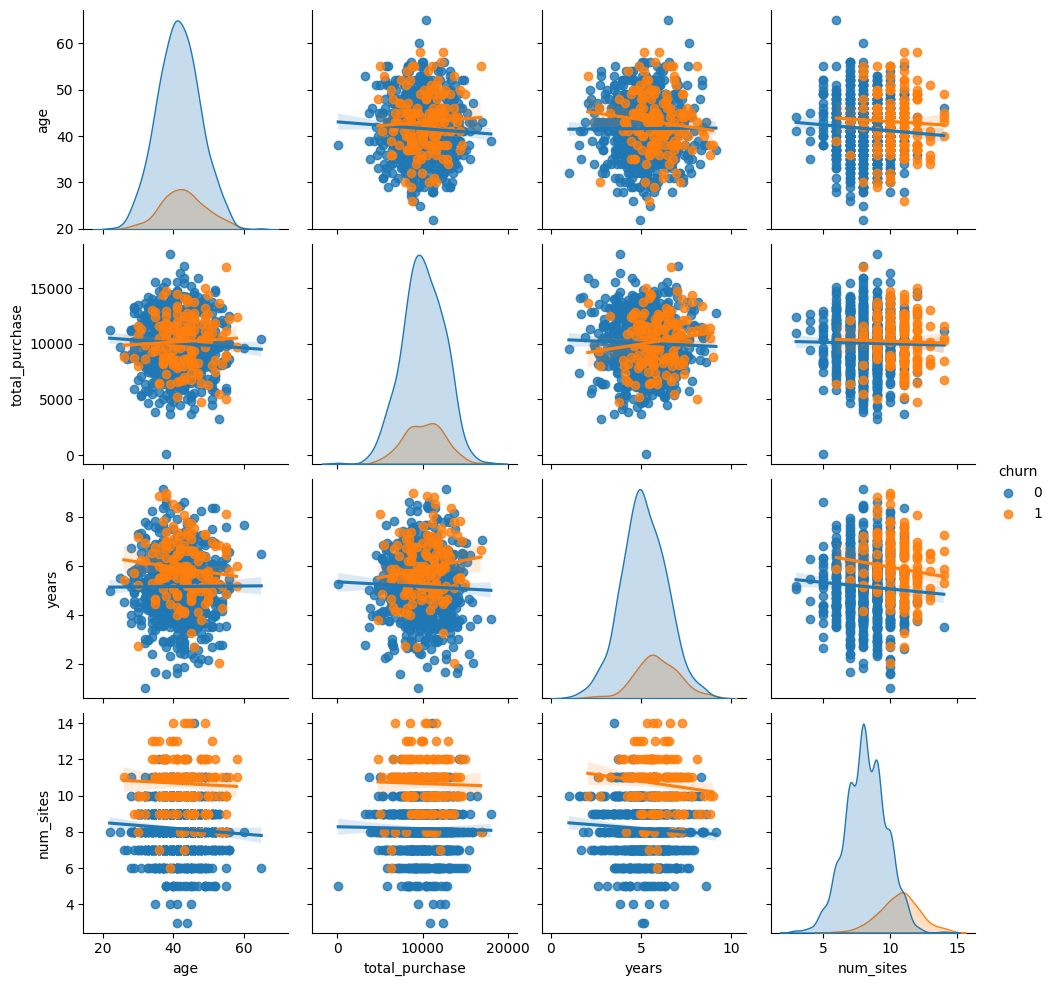

In [25]:
sns.pairplot(kor_data, vars = ["age","total_purchase","years","num_sites"],
             hue = "churn",
             kind = "reg");

**Veri Ön İşleme**

In [26]:
df = df.dropna()

In [28]:
df = df.withColumn("age_sq", df.age**2)
df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_sq|
+-----+----------------+----+--------------+---------------+-----+---------+-----+------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+------+
only showing top 3 rows



Bağımlı Değişkenlerin Ayarlanması

In [40]:
from pyspark.ml.feature import StringIndexer

stringIndexer = StringIndexer(inputCol = "churn", outputCol= "label")

In [42]:
#indexed = stringIndexer.fit(df).transform(df)
df = indexed.withColumn("label", indexed["label"].cast("integer"))
df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_sq', 'double'),
 ('label', 'int')]

Bağımsız Değişkenlerin Ayarlanması

In [44]:
from pyspark.ml.feature import VectorAssembler

In [43]:
bagimsiz_degisken = ["age","total_purchase","account_manager","years","num_sites"]

In [45]:
vectorAssembler = VectorAssembler(inputCols = bagimsiz_degisken, outputCol = "features")

In [46]:
va_df = vectorAssembler.transform(df)

In [49]:
va_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_sq', 'double'),
 ('label', 'int'),
 ('features', 'vector')]

In [54]:
final_df = va_df.select(["features","label"])

final_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
+--------------------+-----+
only showing top 5 rows



**Train-Test**

In [56]:
splits = final_df.randomSplit([0.7,0.3])

train_df = splits[0]
test_df = splits[1]

**GBM Model**

In [59]:
from pyspark.ml.classification import GBTClassifier

In [61]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label" )

gbm_model = gbm.fit(train_df)

In [ ]:
y_pred = gbm_model.transform(test_df)

ac = y_pred.select("label","prediction")

ac.show(10)

In [64]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.8619402985074627

In [66]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
.addGrid(gbm.maxDepth,[2,4,6])
.addGrid(gbm.maxBins,[20,30])
.addGrid(gbm.maxIter,[10,20])
.build())

cv = CrossValidator(estimator = gbm,
                    estimatorParamMaps = paramGrid,
                    evaluator = evaluator,
                    numFolds = 10)

In [67]:
cv_model = cv.fit(train_df)

In [69]:
y_pred = cv_model.transform(test_df)

ac = y_pred.select("label","prediction")



In [70]:
ac.filter(ac.label == ac.prediction).count()/ac.count()

0.8955223880597015

In [71]:
evaluator.evaluate(y_pred)

0.9109267734553775

Bu Müşteriler Bizi Terk Eder Mi ?

In [72]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [73]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [74]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [75]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf)
sonuclar = cv_model.transform(yeni_musteriler)
sonuclar.select("names","prediction").show()

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+

